In [6]:
# https://docs.pymc.io/notebooks/GLM.html

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from pymc3 import  *
import theano
import pandas as pd
from statsmodels.formula.api import glm as glm_sm
import statsmodels.api as sm
from pandas.plotting import scatter_matrix

In [16]:
size = 50
true_intercept = 1
true_slope = 2
x = np.linspace(0, 1, size)
y = true_intercept + x*true_slope + np.random.normal(scale=.5, size=size)
data = {'x': x, 'y': y}

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, x, Intercept]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 34 seconds.


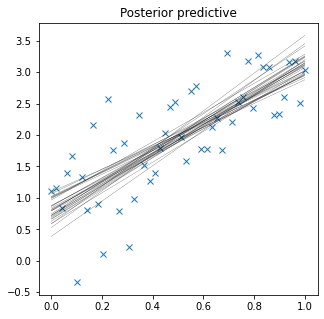

In [17]:
with Model() as model:
    lm = glm.LinearComponent.from_formula('y ~ x', data)
    sigma = Uniform('sigma', 0, 20)
    y_obs = Normal('y_obs', mu=lm.y_est, sigma=sigma, observed=y)
    trace = sample(2000, cores=2)

plt.figure(figsize=(5, 5))
plt.plot(x, y, 'x')
plot_posterior_predictive_glm(trace)

In [21]:
x_out = np.append(x, [.1, .15, .2])
y_out = np.append(y, [8, 6, 9])
data_outlier = dict(x=x_out, y=y_out)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, x, Intercept]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 32 seconds.
The acceptance probability does not match the target. It is 0.8955187784343526, but should be close to 0.8. Try to increase the number of tuning steps.


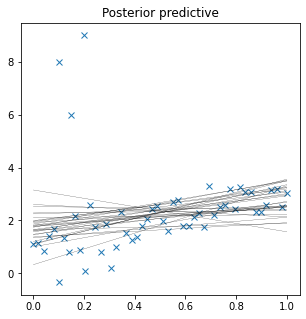

In [22]:
with Model() as model:
    GLM.from_formula('y ~ x', data_outlier)
    trace = sample(2000, cores=2)

plt.figure(figsize=(5, 5))
plt.plot(x_out, y_out, 'x')
plot_posterior_predictive_glm(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [lam, x, Intercept]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 37 seconds.


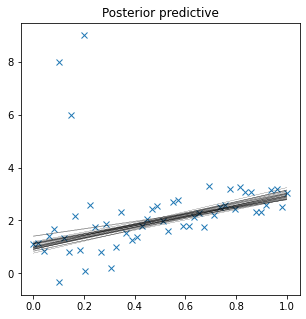

In [23]:
with Model() as model_robust:
    family = glm.families.StudentT(link=glm.families.Identity(),
                                   priors={'nu': 1.5,
                                           'lam': Uniform.dist(0, 20)})
    GLM.from_formula('y ~ x', data_outlier, family=family)
    trace = sample(2000, cores=2)

plt.figure(figsize=(5, 5))
plt.plot(x_out, y_out, 'x')
plot_posterior_predictive_glm(trace)

In [4]:
cov_func

In [ ]:
cov_func = pm.gp.ExpQuad()